Setup - Libraries and File Path

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy

# libs for imgs
import PIL
from PIL import Image
import requests
from io import BytesIO

# libs for utilitarian python graph
import os
import sys


In [6]:
sys.path.append(os.getenv('SRC_DIR'))

First Visualization

In [ ]:
# Load TPL Library Data - Card Registrations .csv - only for 2023
columns = ['Year', 'BranchCode', 'Registrations']
card_reg = (pd.read_csv('../../02_activities/assignments/tpl-card-registrations-annual-by-branch.csv', header = 0, names = columns, skiprows = 1169))
card_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1170 to 1275
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           106 non-null    int64 
 1   BranchCode     106 non-null    object
 2   Registrations  106 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [14]:
# Verify Dataframe contains only data for 2023
card_reg

,Year,BranchCode,Registrations
1170,2023,AB,7208
1171,2023,ACD,3161
1172,2023,AD,943
1173,2023,AG,3984
1174,2023,AH,442
...,...,...,...
1271,2023,WP,740
1272,2023,WS,2523
1273,2023,WY,2570
1274,2023,YO,1334


Test Code

In [ ]:
# # Utilitarian Python way
# # Plot bar graph with TPL branch names and their card registrations in 2023
# card_reg.plot.bar(
#     x ='BranchCode', 
#     y ='Registrations',
#     color = "#001c71" # TPL's blue
#     )
# plt.title("Toronto Public Library Card Registrations per Branch in 2023")
# plt.xlabel('BranchCode')
# plt.ylabel('Registrations')

(-0.5, 2985.5, 1015.5, -0.5)

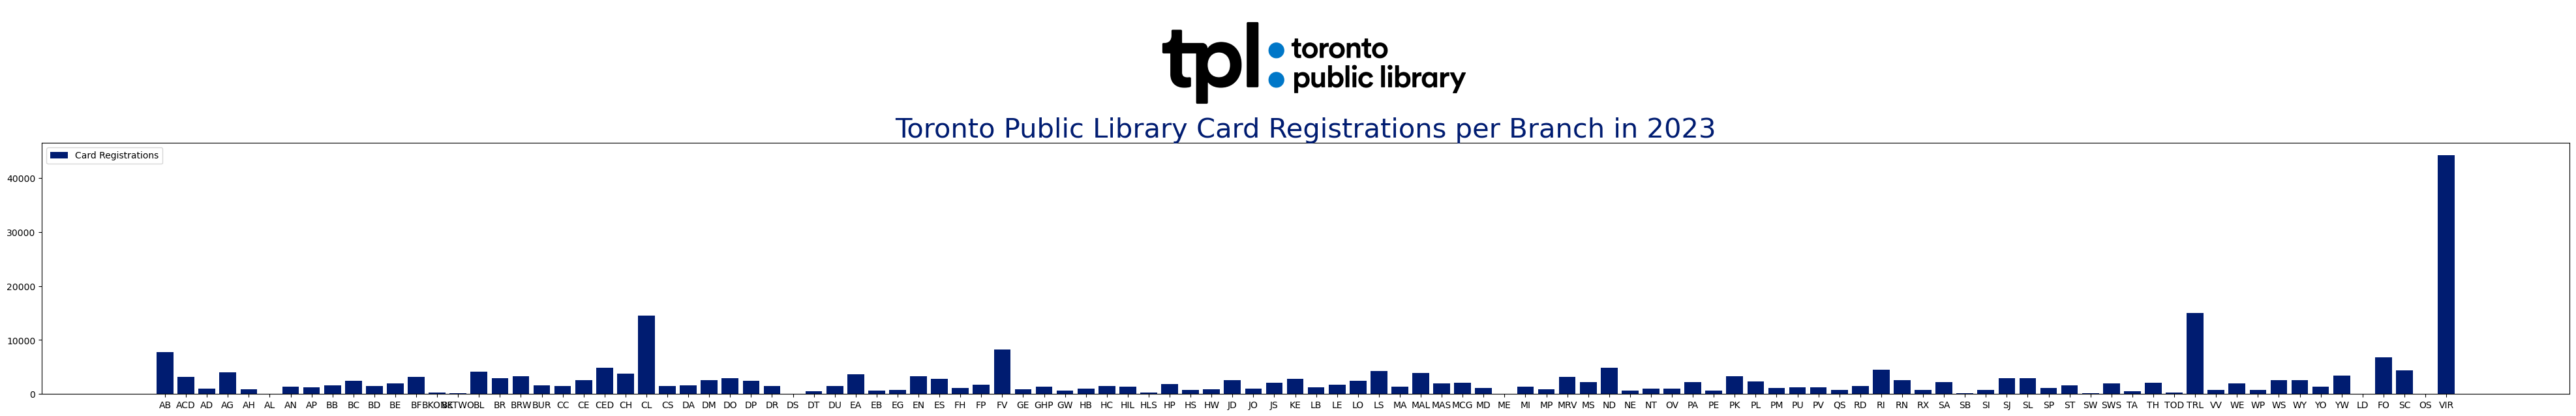

In [153]:
# Plot bar graph with TPL branch names and their card registrations in 2023
x = card_reg['BranchCode']
y = card_reg['Registrations']


fig, ax = plt.subplots(figsize=(50,5))
ax.bar(
    x,
    y,
    label="Card Registrations",
    color = "#001c71",
    )

# Adding title
ax.set_title("Toronto Public Library Card Registrations per Branch in 2023",
        color = "#001c71",
        ha = "center",
        size = 30)

# Adding legend
ax.legend(loc="upper left")


# Load TPL logo
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/4/47/Toronto_Public_Library_Logo.png')
image_file = BytesIO(response.content)
image = Image.open(image_file)
ax_image = fig.add_axes([0.1, 0.95, 0.83, 0.35])
ax_image.imshow(image)
ax_image.axis("off") # take ticks and border off image

Second Visualization

In [109]:
# Load full dataset
# Load TPL Library Data - Card Registrations .csv
columns = ['Year', 'BranchCode', 'Registrations']
card_reg = (pd.read_csv('../../02_activities/assignments/tpl-card-registrations-annual-by-branch.csv', header = 0, names = columns))
card_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 1275
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           1275 non-null   int64 
 1   BranchCode     1275 non-null   object
 2   Registrations  1275 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.8+ KB


In [135]:
# Load TPL Library Data - Card Registrations .csv - loading 2013 and 2023's data into its own dataframe
rows_2013 = range(105,211)

columns = ['Year', 'BranchCode', 'Registrations']
card_reg2013 = (pd.read_csv('../../02_activities/assignments/tpl-card-registrations-annual-by-branch.csv', header = 0, names = columns, skiprows = lambda x: x not in rows_2013))
card_reg2023 = (pd.read_csv('../../02_activities/assignments/tpl-card-registrations-annual-by-branch.csv', header = 0, names = columns, skiprows = 1169))
card_reg2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 106 to 210
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           105 non-null    int64 
 1   BranchCode     105 non-null    object
 2   Registrations  105 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [137]:
# Test parse
card_reg2013

,Year,BranchCode,Registrations
106,2013,AB,4483
107,2013,ACD,1770
108,2013,AD,504
109,2013,AG,3586
110,2013,AH,501
...,...,...,...
206,2013,WP,647
207,2013,WS,2229
208,2013,WY,1000
209,2013,YO,1052


Test Code for aggregating data by year (failed)

In [ ]:
# def test(): # Trying to group data by Year
#     if 'Year' == 2012:
#         sum_ = card_reg['Registration'].sum()
#         print(sum_)
# print(test())

None


In [ ]:
# # Summing Registrations by Year
# def sumYearlyRegistrations():
#     total2012 = 0
#     total2013 = 0
#     total2014 = 0
#     total2015 = 0
#     total2016 = 0
#     total2017 = 0
#     total2018 = 0
#     total2019 = 0
#     total2020 = 0
#     total2021 = 0
#     total2022 = 0
#     total2023 = 0

#     for line in card_reg:
#         if 'Year' == 2012:
#             total2012 += card_reg['Registrations']
#         elif 'Year' == 2013:
#             total2013 += card_reg['Registrations']
#         elif 'Year' == 2014:
#             total2014 += card_reg['Registrations']
#         elif 'Year' == 2015:
#             total2015 += card_reg['Registrations']
#         elif 'Year' == 2016:
#             total2016 += card_reg['Registrations']
#         elif 'Year' == 2017:
#             total2017 += card_reg['Registrations']
#         elif 'Year' == 2018:
#             total2018 += card_reg['Registrations']
#         elif 'Year' == 2019:
#             total2019 += card_reg['Registrations']
#         elif 'Year' == 2020:
#             total2020 += card_reg['Registrations']
#         elif 'Year' == 2021:
#             total2021 += card_reg['Registrations']
#         elif 'Year' == 2022:
#             total2022 += card_reg['Registrations']
#         else:
#             total2023 += card_reg['Registrations']

# print(sumYearlyRegistrations())

None


(-0.5, 2985.5, 1015.5, -0.5)

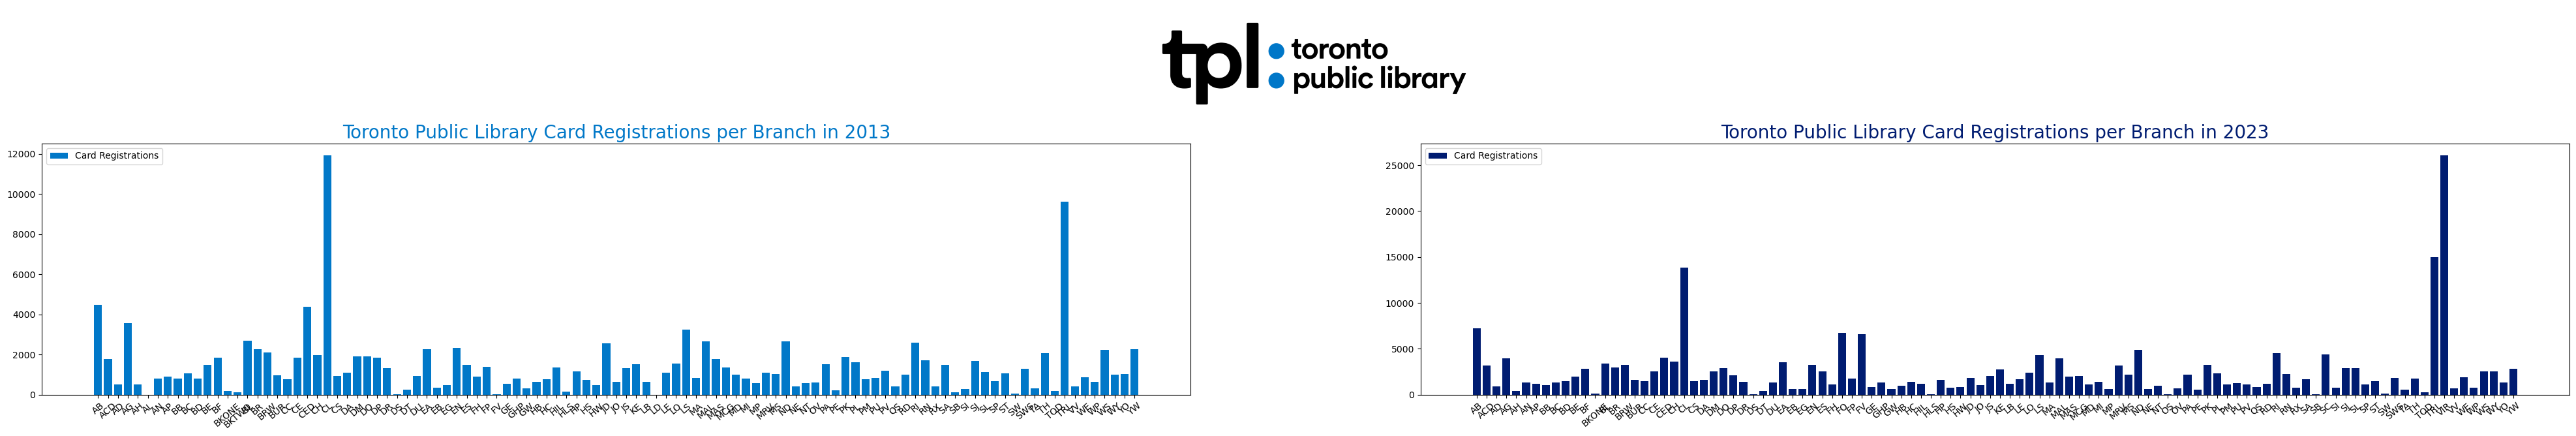

In [172]:
# Plot bar graph with TPL branch names and their card registrations in 2013 & 2023
x1 = card_reg2013['BranchCode']
y1 = card_reg2013['Registrations']
x2 = card_reg2023['BranchCode']
y2 = card_reg2023['Registrations']

fig, (ax1, ax2) = plt.subplots(
    ncols = 2,
    nrows = 1,
    figsize=(50,5))
ax1.bar(
    x1,
    y1,
    label="Card Registrations",
    color = "#0178C8",)
# Rotating ticks for more visability
ax1.set_xticks(x1)
ax1.set_xticklabels(x1,rotation=40)
ax2.bar(
    x2,
    y2,
    label="Card Registrations",
    color = "#001c71",
    )
# Rotating ticks for more visability
ax2.set_xticks(x2)
ax2.set_xticklabels(x2,rotation=40)

# Adding title
ax1.set_title("Toronto Public Library Card Registrations per Branch in 2013",
        color = "#0178C8",
        ha = "center",
        size = 20)
ax1.legend(loc="upper left")
ax2.set_title("Toronto Public Library Card Registrations per Branch in 2023",
        color = "#001c71",
        ha = "center",
        size = 20)
ax2.legend(loc="upper left")

# Load TPL logo
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/4/47/Toronto_Public_Library_Logo.png')
image_file = BytesIO(response.content)
image = Image.open(image_file)
ax_image = fig.add_axes([0.1, 0.95, 0.83, 0.35])
ax_image.imshow(image)
ax_image.axis("off") # take ticks and border off image

> What software did you use to create your data visualization?
VSCode + Python (pandas, matplotlib, etc.).

> Who is your intended audience?
Community stakeholders interested in library branch operations.

> What information or message are you trying to convey with your visualization?
Visibility into library card registrations per branch, and comparing a decade's worth of this data (2013, 2023).

> What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots?
Clean, simple layout. Used familiar colours from TPL's brand, as well as their logo, to clearly communicate what data was being represented. Kept text around the visualization to let the bar graph speak for itself.

> How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?
Data mapped to the rows in the .csv file that align with the years referenced. As long as the next scientist uses the same .csv file from TPL's Open Data source, they'll be able to create graphs based on the 2013 and 2023 data no problem, everything is pulled programmatically.

> How did you ensure that your data visualization is accessible?
High-contrast colours, large (in web display terms) font size, used a monospace font, large graphs!

> Who are the individuals and communities who might be impacted by your visualization?
Individual library branches whose funding may be determined by utilization (in this case, annual card registrations), community members who use the library's services/specific branches, stakeholders in the city evaluating where to distribute resources.

> How did you choose which features of your chosen dataset to include or exclude from your visualization?
Ease of programming - as you can see from the commented-out test code, I was hoping to pull data for each year, programmatically, without having to reference specific rows in the .csv but rather grouping the data by year. I quickly realized this would require either pre-processing the data (less reproducible for folks pulling the dataset directly from TPL's Open Data repo), or continue troubleshooting my functions (for the sake of completeing this assignment, abandoned that for now).

> What ‘underwater labour’ contributed to your final data visualization product?
The team that compiled the original data set, cleaned the data, and published it to make it available for my use.